# Manuka Contamination Filtering


In [7]:
blob <- read.table("/workspace/hraijc/HiC_trials/Manuka/blobplots/ManukaV2.blobplot.ManukaV2.blobplot.blobDB.table.txt", header = T)


In [8]:
library(ggplot2)
library(dplyr)

In [84]:
head(blob)

,name,length,GC,N,bam0,phylum.t.6.s,phylum.s.7.s,phylum.c.8
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<int>
1,scaffold_1,23020833,0.3918,24300,17.1208,Streptophyta,5114,0
2,scaffold_2,14453848,0.3934,19400,18.2834,Streptophyta,6034,0
3,scaffold_3,31070159,0.3976,32700,16.3905,Streptophyta,11361,0
4,scaffold_4,15777695,0.3988,13000,16.2040,Streptophyta,8305,0
5,scaffold_5,6902983,0.3903,8400,16.2886,Streptophyta,6765,0
6,scaffold_6,26175311,0.3974,27600,15.8773,Streptophyta,7450,0


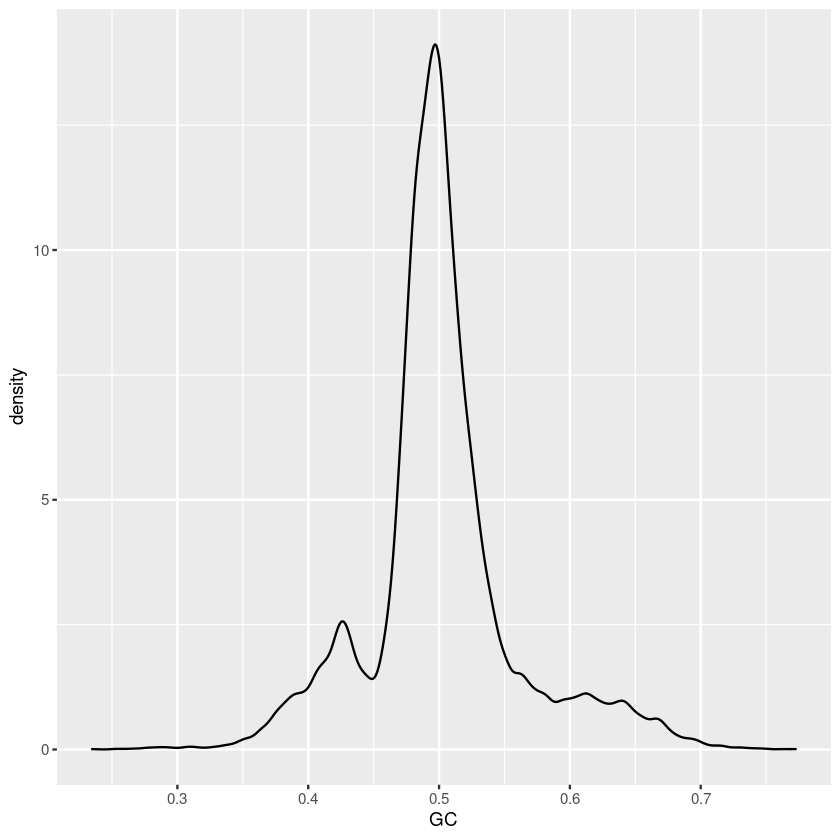

In [13]:
#GC Content distribution
c <- ggplot(blob,aes(GC))
c+ geom_density(kernel="gaussian") #+ xlim(.3,.6)


In [66]:
Plant_blob <- blob %>%
filter(phylum.t.6.s=="Streptophyta")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1466 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 11469 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


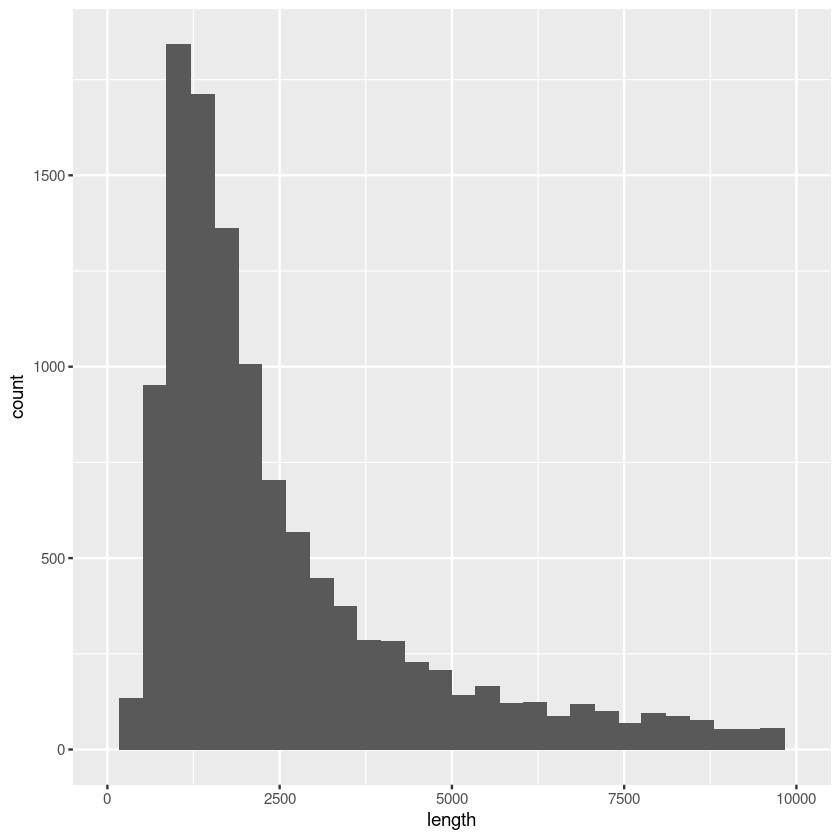

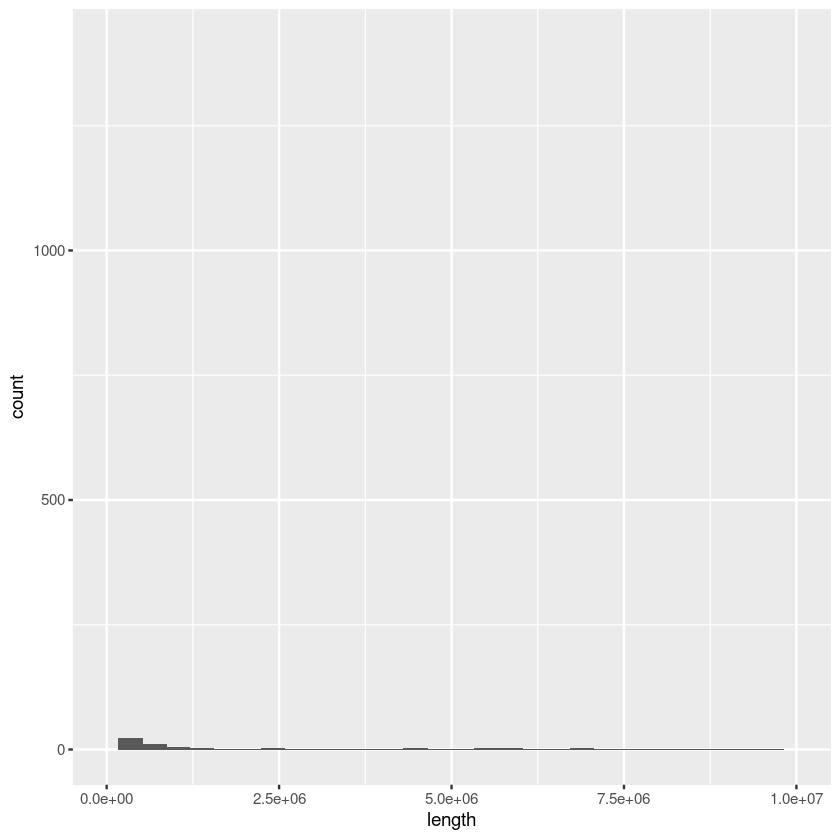

In [63]:
#Contig Length distribution
c <- ggplot(blob,aes(length))
c+ geom_histogram() + xlim(0,10000)
c+ geom_histogram() + xlim(10000,10000000)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



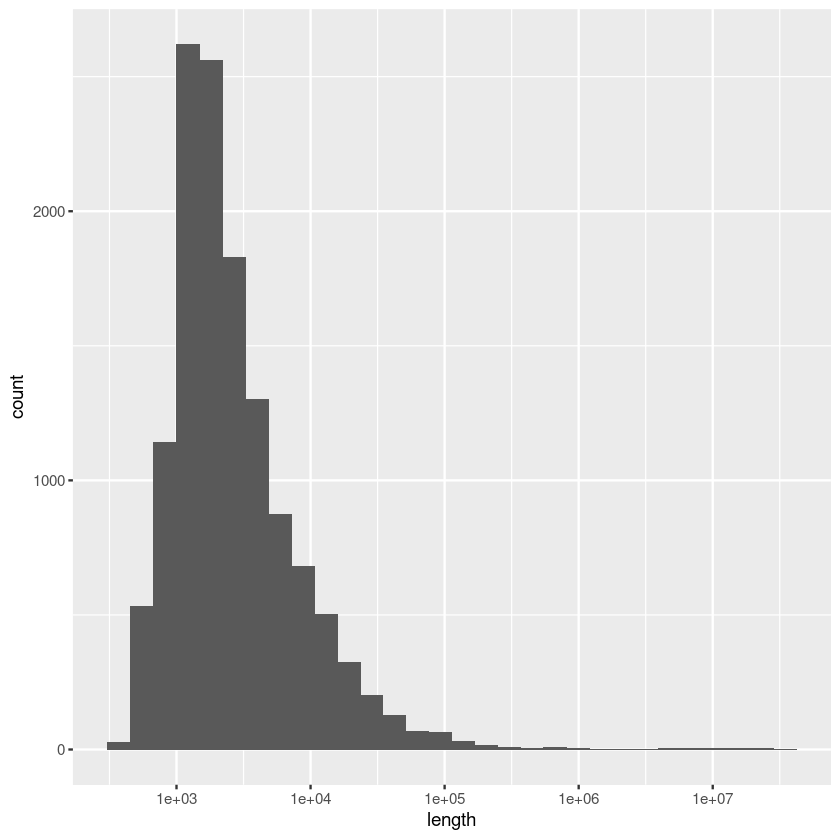

In [64]:
# Read length Histogram of all reads
c+ geom_histogram() + scale_x_log10()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



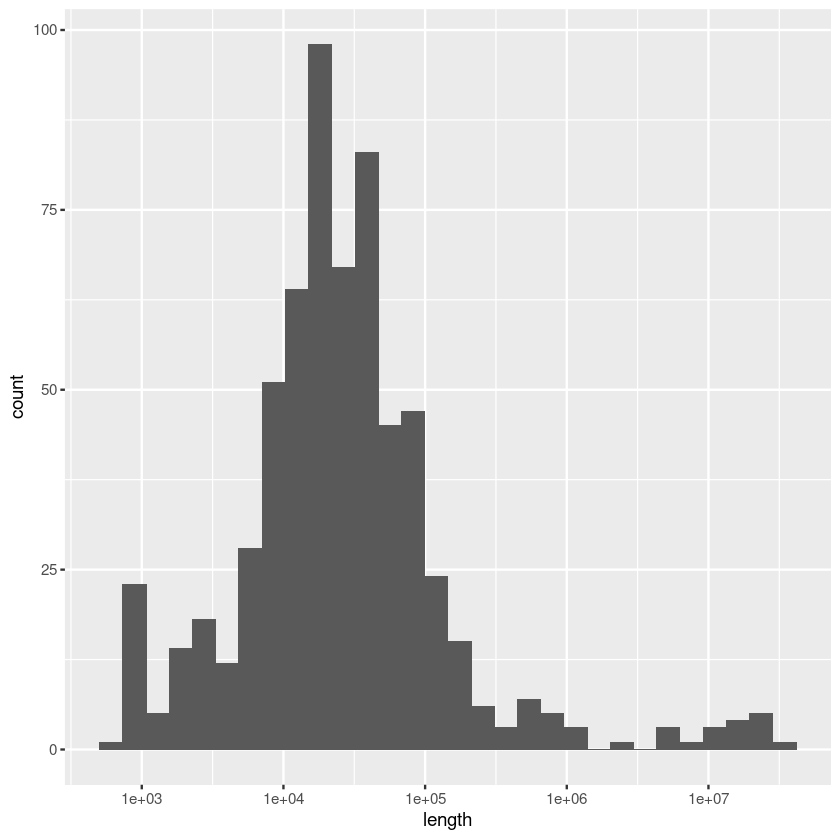

In [65]:
# Read Length Histogram of reads that blast to organism of interest.
s <- ggplot(Strep_blob,aes(length))
s + geom_histogram() + scale_x_log10()

Warning message:
"Transformation introduced infinite values in continuous x-axis"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 13 rows containing non-finite values (stat_bin)."


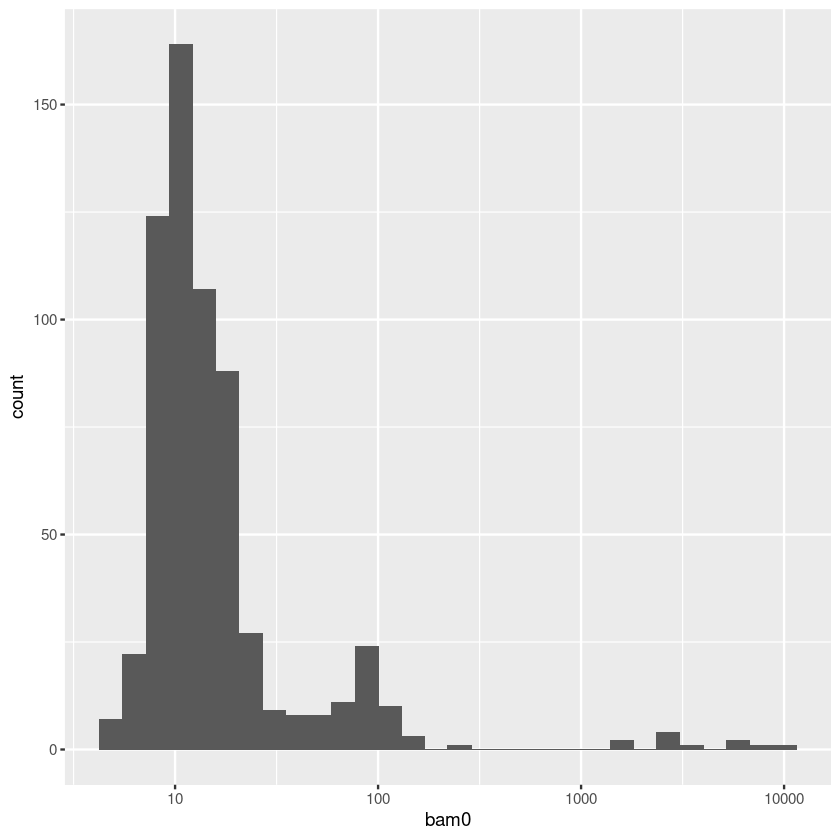

In [86]:
#Histogram of HiC coverage
b <- ggplot(Strep_blob,aes(bam0))
b + geom_histogram() + scale_x_log10()

In [129]:
Plant_blob_keep <- Plant_blob %>%
filter(length >= 10000) %>%
filter(bam0 >=0.50) %>%
filter(GC <= 0.42) %>%
filter(GC >= 0.38)
nrow(Plant_blob)
nrow(Plant_blob_keep)


[1] 637

[1] 289

In [132]:
blob_nohit_keep <- blob %>% 
filter(phylum.t.6.s=="no-hit") %>%
filter(length >= 10000) %>%
filter(bam0 >=0.50) %>%
filter(GC <= 0.42) %>%
filter(GC >= 0.38)
nrow(blob)
nrow(blob_nohit_keep)

[1] 12924

[1] 173

In [147]:
nohitkeep_size <- as.integer(summarise(blob_nohit_keep, sum = sum(length))[])
plantkeep_size <- as.integer(summarise(Plant_blob_keep, sum = sum(length))[])
plant_size <- as.integer(summarise(Plant_blob, sum = sum(length))[])
all_size <- as.integer(summarise(blob, sum = sum(length))[])


In [148]:
100*(nohitkeep_size / all_size)
100*(plantkeep_size / all_size)
100*(plant_size / all_size)

100*((nohitkeep_size+plantkeep_size) / all_size)

[1] 1.325624

[1] 82.36601

[1] 85.75917

[1] 83.69164

In [150]:

keep.names <- c(blob_nohit_keep$name,Plant_blob_keep$name)
length(keep.names)

[1] 462

In [151]:
write(keep.names, file="/workspace/hraijc/HiC_trials/Manuka/blobplots/blobplot_keep.txt")